<a href="https://colab.research.google.com/github/rakshithaelango/Chennai_House_Price_Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chennai House Price Prediction**



Problem Statement Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?




# **Importing all the necessary packages**

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
# Load DataSet
df=pd.read_csv('/content/train-chennai-sale (3).csv')

# **Exploring the DataSet**

In [6]:
# Collecting First 5 rows
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [7]:
# Identifying no.of.rows and columns
df.shape

(7109, 22)

In [8]:
# Collecting columns names
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [9]:
# Collecting overall information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# **Data Cleaning**

In [10]:
# Looking null values 
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In above null and nan values we can see that N BATHROOM has 5 and N BEDROOM has 1 Nan values and QS OVERALL has 48 Nan.

In [12]:
df["N_BEDROOM"].fillna(df["N_BEDROOM"].mode()[0], inplace=True)

In [13]:
df.N_BATHROOM.dtype
df.N_BEDROOM.dtype 

dtype('float64')

In [14]:
df["N_BATHROOM"].fillna(df["N_BATHROOM"].mode()[0], inplace=True)

In [192]:
# Changing DATA TYPE to 'int'
df["N_BEDROOM"]=df["N_BEDROOM"].astype("int")
df["N_BATHROOM"]=df["N_BATHROOM"].astype("int")

"PRT ID," "QS ROOMS," "QS BATHROOM," "QS BEDROOM," and "QS OVERALL" are not necessary for building the ML  model So, we can drop that columns.

In [16]:
#dropping the unneccesary columns
df.drop(columns=['PRT_ID','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],inplace=True)

In [17]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

**1.Area**

In [19]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

More duplicates in this column . Use the REPLACE function to make the necessary changes.

In [20]:
# Replacing_duplicates
replacing_duplicates={'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','Adyr':'Adyar','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
          'Velchery':'Velachery','KKNagar':'KK Nagar','TNagar':'T Nagar'}
df['AREA']=df['AREA'].replace(replacing_duplicates)    

In [21]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [22]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

**2. N_Bedroom**

In [23]:
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

**3. N_Bathroom**

In [24]:
df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

**4. Sale_cond**

In [25]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [26]:
# Replacing duplicates
df=df.replace(to_replace=['Ab Normal'],value='AbNormal')
df=df.replace(to_replace=['Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['AdjLand'],value='Adj Land')    

In [27]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [28]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**5. Park_Facil**

In [29]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [30]:
df=df.replace(to_replace=['Noo'],value='No')

In [31]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
df.PARK_FACIL.value_counts()  

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**6. BuildType**

In [33]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [34]:
map={'Comercial':'Commercial','Other':'Others'}
df['BUILDTYPE']=df['BUILDTYPE'].replace(map)

In [35]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [36]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**7. Utility_Avail**

In [37]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [38]:
df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace({"All Pub": "AllPub", "NoSewr " : "NoSewr"})

In [39]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [40]:
df.UTILITY_AVAIL.value_counts()

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

**8. Street**

In [41]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [42]:
map2={'Pavd':'Paved','NoAccess':'No Access'}
df['STREET']=df['STREET'].replace(map2)

In [43]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [44]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**9. Mzzone**

In [45]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [46]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

**10. Reg_Fee , 11. Commis**

In [47]:
df= df.drop(["REG_FEE", "COMMIS"], axis=1)

In [48]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE'],
      dtype='object')

**12. Date_sale , 13. Date_build**

In [50]:
df.DATE_SALE.dtype
df.DATE_BUILD.dtype

dtype('O')

In [51]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.DATE_BUILD.dtype

<ipython-input-51-775b9786d432>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
<ipython-input-51-775b9786d432>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])


dtype('<M8[ns]')

In [52]:
df["DATE_SALE"][0]

Timestamp('2011-04-05 00:00:00')

**14. N_Room**

In [49]:
df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

# **Feature Engineering**

In [55]:
df['AGE_OF_BUILDING']=(df['DATE_SALE']-df['DATE_BUILD'])/np.timedelta64(1,'Y')
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-04-02             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-09-02  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others        NoSewr   Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

  MZZONE  SALES_PRICE  AGE_OF_BUILDING  
0      A      7600000        43.891387  
1     RH     21717770        10.992697  
2     RL     13159200        19.581511  
3      I      9630290        21.985393  
4      C      7406250        29.574871

In [56]:
df['AGE_OF_BUILDING']=df['AGE_OF_BUILDING'].astype('int')

In [57]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-04-02             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-09-02  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others        NoSewr   Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

  MZZONE  SALES_PRICE  AGE_OF_BUILDING  
0      A      7600000               43  
1     RH     21717770               10  
2     RL     13159200               19  
3      I      9630290               21  
4      C      7406250               29

In [58]:
df=df.drop(["DATE_SALE", "DATE_BUILD"], axis=1)

In [59]:
df.to_csv('cleaned_data_chp ')

**Outliers Detection**

In [191]:
# Statistically description 
df.describe()

AREA     INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM  \
count  7109.000000  7109.000000    7109.000000  7109.000000  7109.000000   
mean      2.539738  1382.073006      99.603179     1.636939     1.213110   
std       1.846837   457.410902      57.403110     0.802881     0.409534   
min       0.000000   500.000000       0.000000     1.000000     1.000000   
25%       1.000000   993.000000      50.000000     1.000000     1.000000   
50%       2.000000  1373.000000      99.000000     1.000000     1.000000   
75%       4.000000  1744.000000     148.000000     2.000000     1.000000   
max       6.000000  2500.000000     200.000000     4.000000     2.000000   

            N_ROOM    SALE_COND   PARK_FACIL  UTILITY_AVAIL       STREET  \
count  7109.000000  7109.000000  7109.000000    7109.000000  7109.000000   
mean      3.688704     2.004501     0.504572       1.574061     1.070755   
std       1.019099     1.419073     0.500014       1.097156     0.795794   
min       2.000000     0.000000     0.000000       0.000000     0.000000   
25%       3.000000     1.000000     0.000000       1.000000     0.000000   
50%       4.000000     2.000000     1.000000       2.000000     1.000000   
75%       4.000000     3.000000     1.000000       3.000000     2.000000   
max       6.000000     4.000000     1.000000       3.000000     2.000000   

            MZZONE   SALES_PRICE  AGE_OF_BUILDING  
count  7109.000000  7.109000e+03      7109.000000  
mean      3.317344  1.089491e+07        23.550710  
std       1.498831  3.768603e+06        12.435546  
min       0.000000  2.156875e+06         3.000000  
25%       3.000000  8.272100e+06        13.000000  
50%       4.000000  1.033505e+07        23.000000  
75%       5.000000  1.299390e+07        33.000000  
max       5.000000  2.366734e+07        55.000000

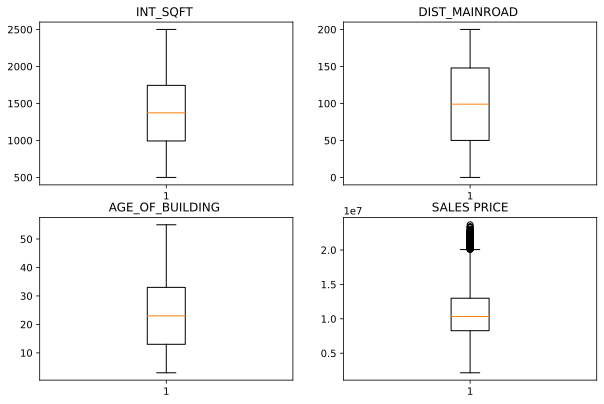

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(321)
plt.boxplot(df["INT_SQFT"])
plt.title("INT_SQFT ")

plt.subplot(322)
plt.boxplot(df["DIST_MAINROAD"])
plt.title("DIST_MAINROAD ")

plt.subplot(323)
plt.boxplot(df["AGE_OF_BUILDING"])
plt.title("AGE_OF_BUILDING ")

plt.subplot(324)
plt.boxplot(df["SALES_PRICE"])
plt.title("SALES PRICE")
plt.show()

In [69]:
df["SALES_PRICE"].max()       

23667340

In [70]:
df.SALES_PRICE.mean()

10894909.63918976

In [71]:
df.to_csv('guvi_app')

**Outliers Observation:**

---



No outliers in INT_SQFT, DIST_MAINROAD, AGE_OF_BUILDING COLUMNS.

Outliers in Sales price. But it is valid outliers.


# **Exploratary Data Analysis**

In [72]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0  Karapakkam      1004            131          1           1       3   
1  Anna Nagar      1986             26          2           1       5   
2       Adyar       909             70          1           1       3   
3   Velachery      1855             14          3           2       5   
4  Karapakkam      1226             84          1           1       3   

  SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL  STREET MZZONE  SALES_PRICE  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A      7600000   
1  AbNormal         No  Commercial        AllPub  Gravel     RH     21717770   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL     13159200   
3    Family         No      Others        NoSewr   Paved      I      9630290   
4  AbNormal        Yes      Others        AllPub  Gravel      C      7406250   

   AGE_OF_BUILDING  
0               43  
1               10  
2               19  
3               21  
4               29

In [73]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'SALES_PRICE', 'AGE_OF_BUILDING'],
      dtype='object')

**1. Area**

Text(0.5, 1.0, 'Area Wise Sales')

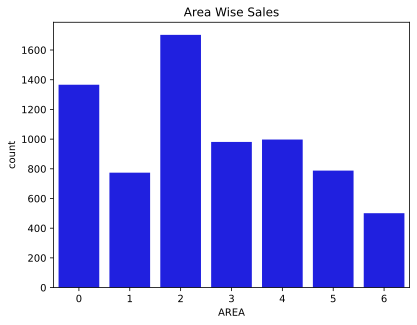

In [170]:
sns.countplot(data=df,x='AREA' , color = 'blue')
plt.title('Area Wise Sales')

**2. Sales Condition**

Text(0.5, 1.0, 'Sales Condition')

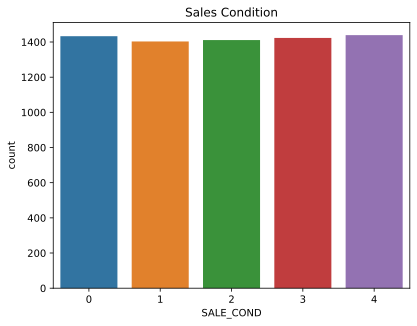

In [172]:
sns.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

**3. Parking Facility**

Text(0.5, 1.0, 'Parking Facility')

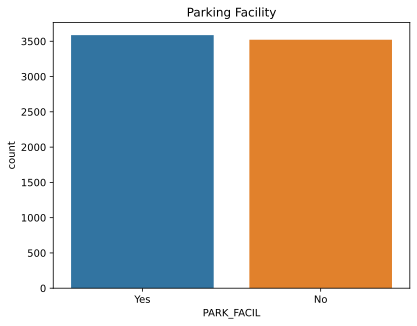

In [76]:
sns.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

**4. Building Type**

Text(0.5, 1.0, 'Building Type')

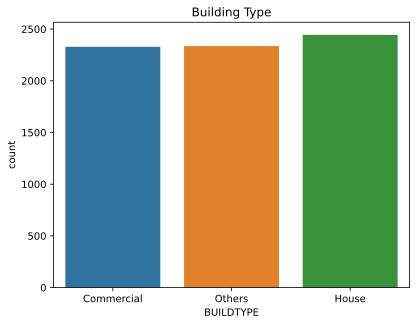

In [173]:
sns.countplot(data=df,x='BUILDTYPE')
plt.title('Building Type')

**5. Utility Available**

Text(0.5, 1.0, 'Utility Available')

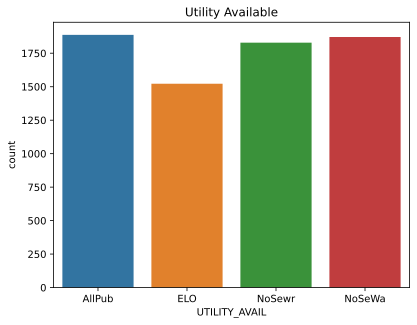

In [78]:
sns.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

**6. Street**

Text(0.5, 1.0, 'Street Type')

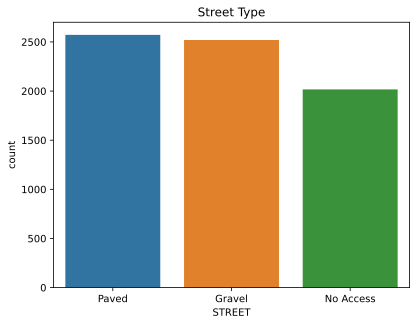

In [79]:
sns.countplot(data=df,x='STREET')
plt.title('Street Type')

**7. Mzzone**

Text(0.5, 1.0, 'Zones of Chennai')

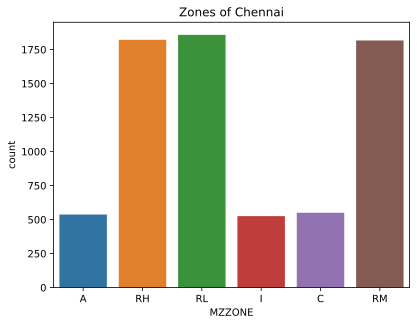

In [80]:
sns.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')

**Continous Data**

**8. Int_Sqft**

<Axes: >

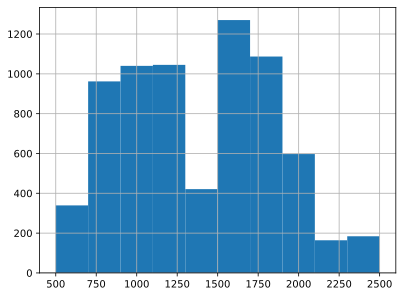

In [83]:
df.INT_SQFT.hist()

<ipython-input-84-e3c843d72a0e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['INT_SQFT'])


Text(0.5, 1.0, 'Area in Squarefeet')

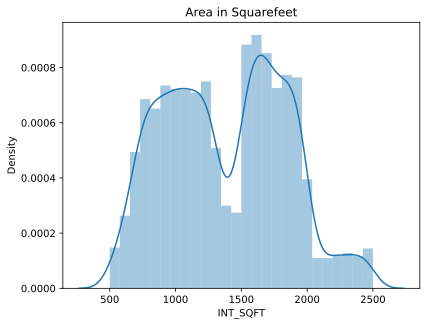

In [84]:
sns.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

**9. Dist_Mainroad**

<Axes: >

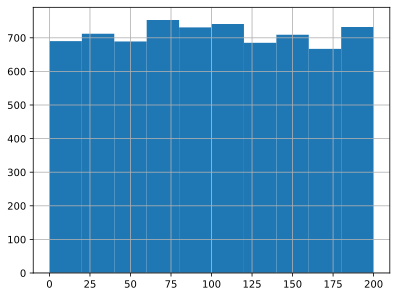

In [85]:
df.DIST_MAINROAD.hist()

<ipython-input-86-7ae05fe9de4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DIST_MAINROAD'])


Text(0.5, 1.0, 'Distance from Mainroad(in meters)')

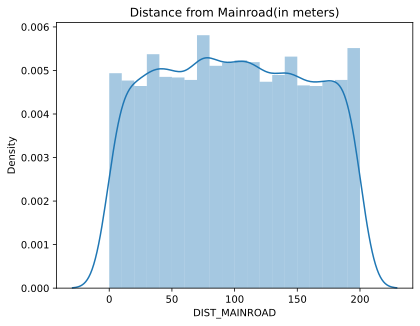

In [86]:
sns.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

**10. Sales_Price**

<ipython-input-87-a51dc70ace22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SALES_PRICE'])


Text(0.5, 1.0, 'SALES PRICE')

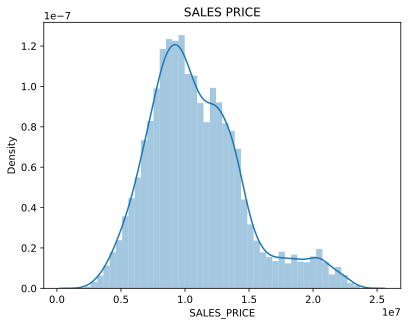

In [87]:
sns.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

In [175]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], scatter_kws={"color" : "red"}, line_kws={"color":"black"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sns.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], scatter_kws={"color" : "black"}, line_kws={"color":"red"})
plt.title("DIST_MAINROAD vs SALES_PRICE")

plt.subplot(323)
sns.regplot(x = df["AGE_OF_BUILDING"], y =df["SALES_PRICE"], scatter_kws={"color" : "brown"}, line_kws={"color":"yellow"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

Text(0.5, 1.0, 'AGE_OF_BUILDING vs SALES_PRICE')

**Categorical Data Feature vs Target**

In [93]:
temp =pd.DataFrame(df.groupby('AREA')['SALES_PRICE'].mean())
temp = temp.sort_values(by='SALES_PRICE')
temp['AREA']=temp.index
AREA_values = temp.AREA.unique()
px.bar(temp,x='AREA',y='SALES_PRICE',color='SALES_PRICE')

**Area vs Sales_price**

Text(0.5, 1.0, 'AREA vs SALES_PRICE')

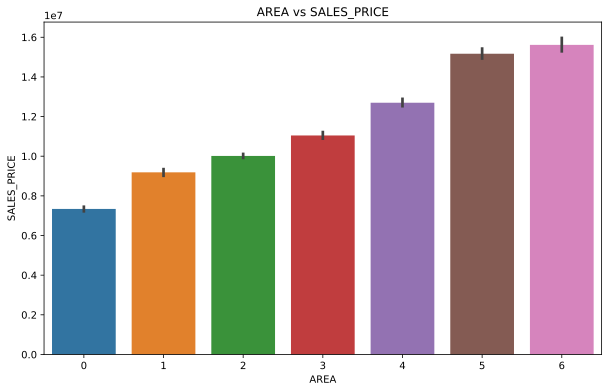

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.AREA,y=df.SALES_PRICE,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

**Sale_cond vs Sales_price**

Text(0.5, 1.0, 'SALE_COND vs SALES_PRICE')

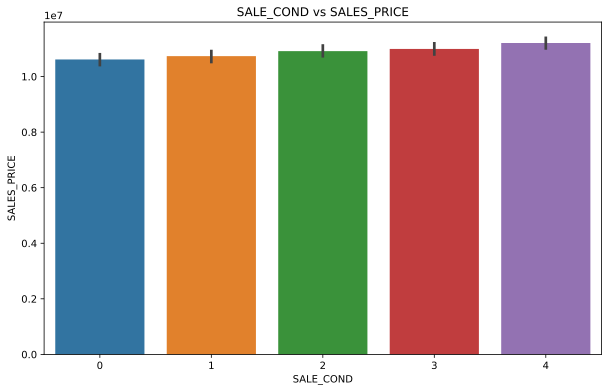

In [178]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.SALE_COND,y=df.SALES_PRICE,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

**N_Bathroom vs Sales_price**

Text(0.5, 1.0, 'N_BATHROOM vs SALES_PRICE')

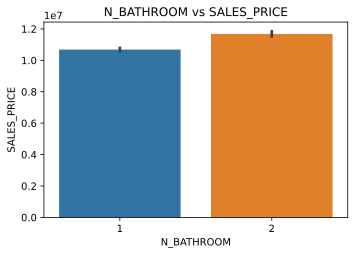

In [182]:
plt.figure(figsize=(12,12))
plt.subplot(321)
sns.barplot(x=df.N_BATHROOM,y=df.SALES_PRICE,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

**N_Bedroom vs Sales_Price**

Text(0.5, 1.0, 'N_BEDROOM vs SALES_PRICE')

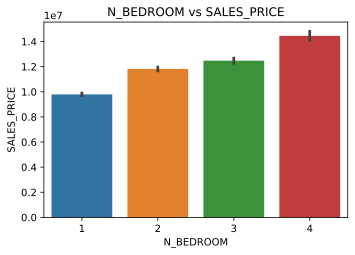

In [183]:
plt.figure(figsize=(12,12))
plt.subplot(322)
sns.barplot(x=df.N_BEDROOM,y=df.SALES_PRICE,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

**Park_facil vs Sales_price**

Text(0.5, 1.0, 'PARK_FACIL vs SALES_PRICE')

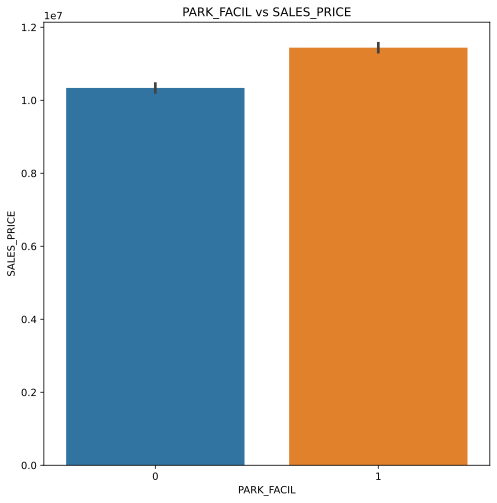

In [185]:
plt.figure(figsize=(8,8))
sns.barplot(x=df.PARK_FACIL,y=df.SALES_PRICE,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE') 

**Buildtype vs Sales_price**

Text(0.5, 1.0, 'BUILDTYPE vs SALES_PRICE')

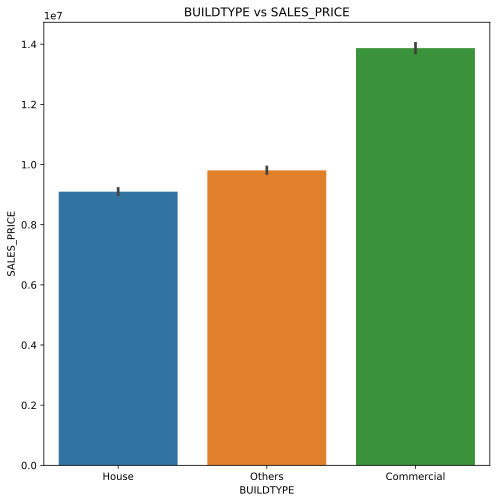

In [186]:
plt.figure(figsize=(8,8))
sns.barplot(x=df.BUILDTYPE,y=df.SALES_PRICE, order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

**Street vs Sales_price**

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

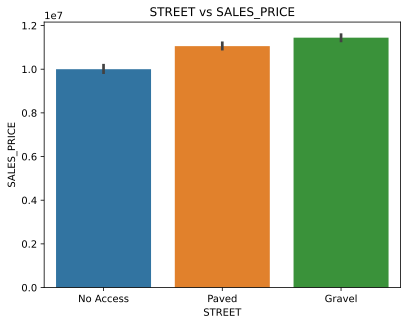

In [100]:
sns.barplot(x=df.STREET,y=df.SALES_PRICE,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')

**Mzzone vs Sales_price**

Text(0.5, 1.0, 'MZZONE vs SALES_PRICE')

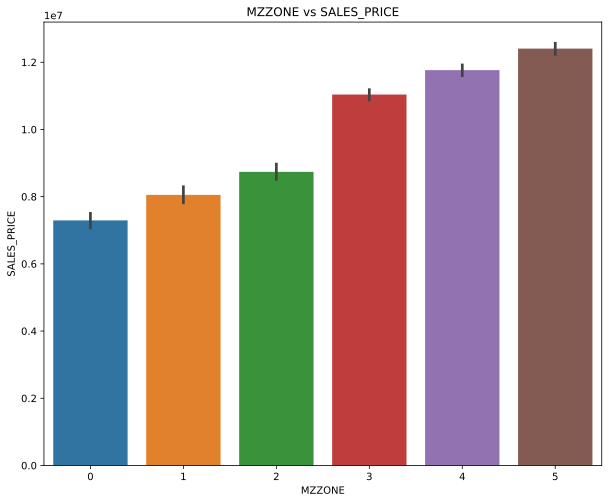

In [187]:
plt.figure(figsize=(10,8))
sns.barplot(x=df.MZZONE,y=df.SALES_PRICE,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

**N_Room vs Sales_Price**

Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

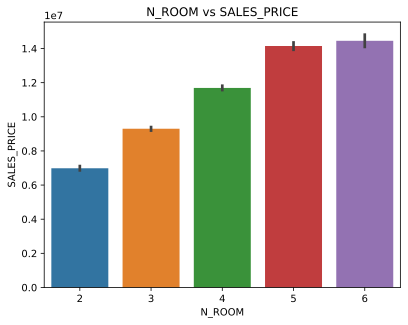

In [102]:
sns.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

<ipython-input-190-a5fb59decfef>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



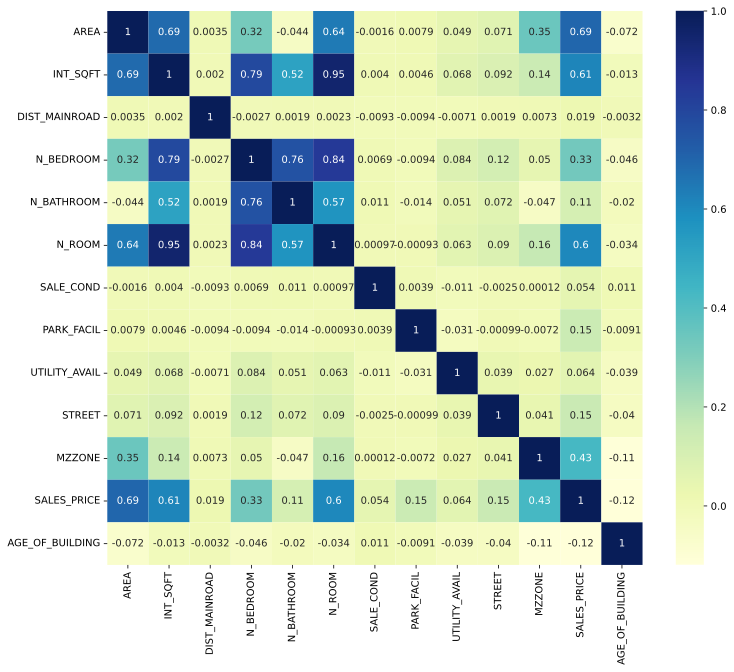

In [190]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap = "YlGnBu")
plt.show()

**Overall Observation:**

---



1. linear relationship between Area, MZ Zone, N ROOM, N BEDROOM, N BATHROOM, STREET,SALE COND and TOTAL SALE PRICE.

2. AREA, STREET, MZ ZONE, and SALE COND, apply ordinal encoding.

3. no linear relationship, BUILDTYPE. choose one hot encoding.

4. linear relationship between UTILITY AVAIL and STREET and TOTAL SALE PRICE. having less impact than other features.

# **Encoding**

**Ordinal Encoding**

In [104]:
df1=df

In [105]:
df

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131          1           1       3   
1     Anna Nagar      1986             26          2           1       5   
2          Adyar       909             70          1           1       3   
3      Velachery      1855             14          3           2       5   
4     Karapakkam      1226             84          1           1       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51          1           1       2   
7105   Velachery      1897             52          3           2       5   
7106   Velachery      1614            152          2           1       4   
7107  Karapakkam       787             40          1           1       2   
7108   Velachery      1896            156          3           2       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others        NoSewr      Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104     Adj Land         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      SALES_PRICE  AGE_OF_BUILDING  
0         7600000               43  
1        21717770               10  
2        13159200               19  
3         9630290               21  
4         7406250               29  
...           ...              ...  
7104      5353000               49  
7105     10818480                8  
7106      8351410               28  
7107      8507000               31  
7108      9976480               43  

[7109 rows x 14 columns]

In [106]:
df1

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0     Karapakkam      1004            131          1           1       3   
1     Anna Nagar      1986             26          2           1       5   
2          Adyar       909             70          1           1       3   
3      Velachery      1855             14          3           2       5   
4     Karapakkam      1226             84          1           1       3   
...          ...       ...            ...        ...         ...     ...   
7104  Karapakkam       598             51          1           1       2   
7105   Velachery      1897             52          3           2       5   
7106   Velachery      1614            152          2           1       4   
7107  Karapakkam       787             40          1           1       2   
7108   Velachery      1896            156          3           2       5   

        SALE_COND PARK_FACIL   BUILDTYPE UTILITY_AVAIL     STREET MZZONE  \
0        AbNormal        Yes  Commercial        AllPub      Paved      A   
1        AbNormal         No  Commercial        AllPub     Gravel     RH   
2        AbNormal        Yes  Commercial           ELO     Gravel     RL   
3          Family         No      Others        NoSewr      Paved      I   
4        AbNormal        Yes      Others        AllPub     Gravel      C   
...           ...        ...         ...           ...        ...    ...   
7104     Adj Land         No      Others           ELO  No Access     RM   
7105       Family        Yes      Others        NoSeWa  No Access     RH   
7106  Normal Sale         No       House        NoSeWa     Gravel      I   
7107      Partial        Yes  Commercial           ELO      Paved     RL   
7108      Partial        Yes      Others           ELO      Paved      I   

      SALES_PRICE  AGE_OF_BUILDING  
0         7600000               43  
1        21717770               10  
2        13159200               19  
3         9630290               21  
4         7406250               29  
...           ...              ...  
7104      5353000               49  
7105     10818480                8  
7106      8351410               28  
7107      8507000               31  
7108      9976480               43  

[7109 rows x 14 columns]

In [107]:

df1["AREA"] = df1["AREA"].replace({"Karapakkam": 0,"Adyar": 1, "T Nagar": 6, "Chrompet": 2, "Velachery": 3, "Anna Nagar" : 5,"KK Nagar" : 4})
df1["SALE_COND"] = df1["SALE_COND"].replace({"Partial": 0,"Family": 1,"AbNormal": 2, "Normal Sale": 3,"Adj Land" : 4})
df1["UTILITY_AVAIL"] = df1["UTILITY_AVAIL"].replace({"ELO": 0, "NoSeWa": 1, "NoSewr" : 2, "AllPub": 3})
df1["STREET"] = df1["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})
df1["MZZONE"] = df1["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

In [108]:
df1

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131          1           1       3          2   
1        5      1986             26          2           1       5          2   
2        1       909             70          1           1       3          2   
3        3      1855             14          3           2       5          1   
4        0      1226             84          1           1       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51          1           1       2          4   
7105     3      1897             52          3           2       5          1   
7106     3      1614            152          2           1       4          3   
7107     0       787             40          1           1       2          0   
7108     3      1896            156          3           2       5          0   

     PARK_FACIL   BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  \
0           Yes  Commercial              3       1       0      7600000   
1            No  Commercial              3       2       3     21717770   
2           Yes  Commercial              0       2       4     13159200   
3            No      Others              2       1       2      9630290   
4           Yes      Others              3       2       1      7406250   
...         ...         ...            ...     ...     ...          ...   
7104         No      Others              0       0       5      5353000   
7105        Yes      Others              1       0       3     10818480   
7106         No       House              1       2       2      8351410   
7107        Yes  Commercial              0       1       4      8507000   
7108        Yes      Others              0       1       2      9976480   

      AGE_OF_BUILDING  
0                  43  
1                  10  
2                  19  
3                  21  
4                  29  
...               ...  
7104               49  
7105                8  
7106               28  
7107               31  
7108               43  

[7109 rows x 14 columns]

**Label Encoding**

In [109]:
df1["PARK_FACIL"] = df1["PARK_FACIL"].replace({"No": 0, "Yes": 1})

In [110]:
df1

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131          1           1       3          2   
1        5      1986             26          2           1       5          2   
2        1       909             70          1           1       3          2   
3        3      1855             14          3           2       5          1   
4        0      1226             84          1           1       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51          1           1       2          4   
7105     3      1897             52          3           2       5          1   
7106     3      1614            152          2           1       4          3   
7107     0       787             40          1           1       2          0   
7108     3      1896            156          3           2       5          0   

      PARK_FACIL   BUILDTYPE  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  \
0              1  Commercial              3       1       0      7600000   
1              0  Commercial              3       2       3     21717770   
2              1  Commercial              0       2       4     13159200   
3              0      Others              2       1       2      9630290   
4              1      Others              3       2       1      7406250   
...          ...         ...            ...     ...     ...          ...   
7104           0      Others              0       0       5      5353000   
7105           1      Others              1       0       3     10818480   
7106           0       House              1       2       2      8351410   
7107           1  Commercial              0       1       4      8507000   
7108           1      Others              0       1       2      9976480   

      AGE_OF_BUILDING  
0                  43  
1                  10  
2                  19  
3                  21  
4                  29  
...               ...  
7104               49  
7105                8  
7106               28  
7107               31  
7108               43  

[7109 rows x 14 columns]

**One-Hot Encoding**

In [112]:
df1 = pd.get_dummies(df1, columns=["BUILDTYPE"])

In [113]:
df1

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0        0      1004            131          1           1       3          2   
1        5      1986             26          2           1       5          2   
2        1       909             70          1           1       3          2   
3        3      1855             14          3           2       5          1   
4        0      1226             84          1           1       3          2   
...    ...       ...            ...        ...         ...     ...        ...   
7104     0       598             51          1           1       2          4   
7105     3      1897             52          3           2       5          1   
7106     3      1614            152          2           1       4          3   
7107     0       787             40          1           1       2          0   
7108     3      1896            156          3           2       5          0   

      PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  SALES_PRICE  AGE_OF_BUILDING  \
0              1              3       1       0      7600000               43   
1              0              3       2       3     21717770               10   
2              1              0       2       4     13159200               19   
3              0              2       1       2      9630290               21   
4              1              3       2       1      7406250               29   
...          ...            ...     ...     ...          ...              ...   
7104           0              0       0       5      5353000               49   
7105           1              1       0       3     10818480                8   
7106           0              1       2       2      8351410               28   
7107           1              0       1       4      8507000               31   
7108           1              0       1       2      9976480               43   

      BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                        1                0                 0  
1                        1                0                 0  
2                        1                0                 0  
3                        0                0                 1  
4                        0                0                 1  
...                    ...              ...               ...  
7104                     0                0                 1  
7105                     0                0                 1  
7106                     0                1                 0  
7107                     1                0                 0  
7108                     0                0                 1  

[7109 rows x 16 columns]

In [115]:
df1.to_csv("cleaned_data")

Now, we ready to start applying the machine learning models.

# **Splitting The DataSet**

In [116]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']

In [117]:
X.shape

(7109, 15)

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [119]:
x_train.shape

(5687, 15)

In [120]:
x_test.shape

(1422, 15)

# **Machine Learning Models**

**1. Linear Regression**

In [121]:
# Importing the model 
from sklearn.linear_model import LinearRegression

In [122]:
# Building the model
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
# Final prediction
y_pred = lr.predict(x_test)
y_pred

array([11091124.8745102 , 14341919.88292453, 14623300.50667736, ...,
        6552550.83069073,  8662481.23908959, 15556856.56411192])

In [124]:
# Actual / Predicted
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

Actual     Predicted
6107   9866820  1.109112e+07
6964  14238410  1.434192e+07
6580  13547020  1.462330e+07
1036  14048900  1.423862e+07
1469   7439700  6.308869e+06
...        ...           ...
6279  12181500  1.207401e+07
6190  13491940  1.388860e+07
1828   6408750  6.552551e+06
5125   9387600  8.662481e+06
4277  14844980  1.555686e+07

[1422 rows x 2 columns]

In [125]:
# Evaluvatting The Model
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 92.91 %


**2. K-Nearest Neighbour (KNN)**

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train) 
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [127]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
for i in [1,2,3,4,5,6,7,8,9,10,20,40,50,80,100]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,y_train) 
  print("K value  : " , i, " score : ", metrics.r2_score(y_test,y_pred))

K value  :  1  score :  0.9291306332655315
K value  :  2  score :  0.9291306332655315
K value  :  3  score :  0.9291306332655315
K value  :  4  score :  0.9291306332655315
K value  :  5  score :  0.9291306332655315
K value  :  6  score :  0.9291306332655315
K value  :  7  score :  0.9291306332655315
K value  :  8  score :  0.9291306332655315
K value  :  9  score :  0.9291306332655315
K value  :  10  score :  0.9291306332655315
K value  :  20  score :  0.9291306332655315
K value  :  40  score :  0.9291306332655315
K value  :  50  score :  0.9291306332655315
K value  :  80  score :  0.9291306332655315
K value  :  100  score :  0.9291306332655315


In [128]:
# Importing / Bulding  the model 
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
     

KNeighborsRegressor()

In [129]:
# Final Prediction
y_pred_KNN = KNN.predict(X_test)
y_pred_KNN

array([10542380., 12481780., 13309742., ...,  7489203.,  9858544.,
       13868852.])

In [130]:
# Actual / predicted
result_KNN= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_KNN})
result_KNN

Actual   Predicted
6107   9866820  10542380.0
6964  14238410  12481780.0
6580  13547020  13309742.0
1036  14048900  12211110.0
1469   7439700   7260563.0
...        ...         ...
6279  12181500  11531093.0
6190  13491940  12341484.0
1828   6408750   7489203.0
5125   9387600   9858544.0
4277  14844980  13868852.0

[1422 rows x 2 columns]

In [131]:
# Evaluvating the model 
from sklearn import metrics
KNN1 = metrics.r2_score(y_test,y_pred_KNN)
print('R2- SCORE FOR KNN MODEL:', round((KNN1*100),2),"%")

R2- SCORE FOR KNN MODEL: 94.43 %


**3. Random Forest Regression**  

In [138]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [139]:
# Importing the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=150)

In [140]:
# Final prediction
y_pred_rf = rf.predict(x_test)

In [141]:
# Actual / Predicted
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

Actual     Predicted
6107   9866820  9.906674e+06
6964  14238410  1.350585e+07
6580  13547020  1.291374e+07
1036  14048900  1.303543e+07
1469   7439700  7.532323e+06
...        ...           ...
6279  12181500  1.225485e+07
6190  13491940  1.286776e+07
1828   6408750  7.088371e+06
5125   9387600  9.529229e+06
4277  14844980  1.400537e+07

[1422 rows x 2 columns]

In [142]:
# Evaluating the Model
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 97.52 %


**4. XG-Boost**

In [143]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=5)

In [144]:
# Importing the model 
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.3206242053855648  Cross-Val score :  -0.3314462576531025
Learning rate :  0.02  Train score :  0.8037744749803893  Cross-Val score :  0.7962973525282913
Learning rate :  0.03  Train score :  0.9645303964062913  Cross-Val score :  0.9589239698119737
Learning rate :  0.04  Train score :  0.9898933623414359  Cross-Val score :  0.9853365067493272
Learning rate :  0.05  Train score :  0.9952166676193805  Cross-Val score :  0.991339473596595
Learning rate :  0.1  Train score :  0.9988206935701537  Cross-Val score :  0.9962493085723869
Learning rate :  0.11  Train score :  0.998883209187652  Cross-Val score :  0.9963984972523827
Learning rate :  0.12  Train score :  0.9990107059978889  Cross-Val score :  0.9965099788077623
Learning rate :  0.13  Train score :  0.9990752545081516  Cross-Val score :  0.9964837198722083
Learning rate :  0.14  Train score :  0.9991300853417336  Cross-Val score :  0.9965826520829323
Learning rate :  0.15  Train score :  0.9

In [145]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test)

0.990136695980884

In [146]:
# Final prediction
XG_pred= model.predict(x_test)

In [147]:
# Actual / predicted
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})
result_XG

Actual   Predicted
6107   9866820   9734026.0
6964  14238410  14232832.0
6580  13547020  13516933.0
1036  14048900  14234468.0
1469   7439700   8213231.0
...        ...         ...
6279  12181500  12777053.0
6190  13491940  13265674.0
1828   6408750   6406702.5
5125   9387600   9520154.0
4277  14844980  14844200.0

[1422 rows x 2 columns]

In [149]:
# Evaluvating the Model
from sklearn import metrics
XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 98.08 %


**R2 Score for all the models:**

---



R2- Score For Linear Regression: 92.91 %

R2- Score For Knn : 94.43 %

R2- Score For Random Forest  : 97.52 %

R2- Score For XG-Boost : 98.08 %


# **Feature Importance**

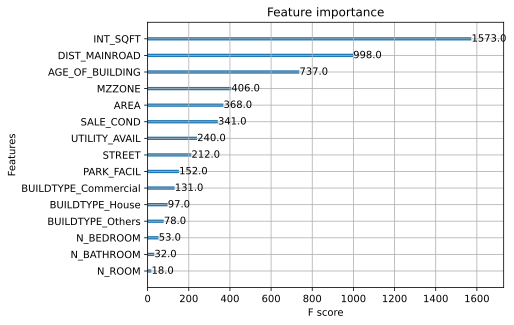

In [154]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [155]:
print(model.feature_importances_)

[3.1376573e-01 1.3088090e-02 4.7141721e-04 7.0755123e-03 6.3331858e-03
 7.5283442e-03 2.2451493e-03 1.9896969e-02 1.0973533e-03 1.2772227e-02
 1.7157041e-02 1.3029719e-03 5.8196288e-01 8.1326021e-03 7.1705342e-03]


In [157]:
feature_scores = pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

BUILDTYPE_Commercial    58.196289
AREA                    31.376574
PARK_FACIL               1.989697
MZZONE                   1.715704
INT_SQFT                 1.308809
STREET                   1.277223
BUILDTYPE_House          0.813260
N_ROOM                   0.752834
BUILDTYPE_Others         0.717053
N_BEDROOM                0.707551
N_BATHROOM               0.633319
SALE_COND                0.224515
AGE_OF_BUILDING          0.130297
UTILITY_AVAIL            0.109735
DIST_MAINROAD            0.047142
dtype: float32

<Axes: >

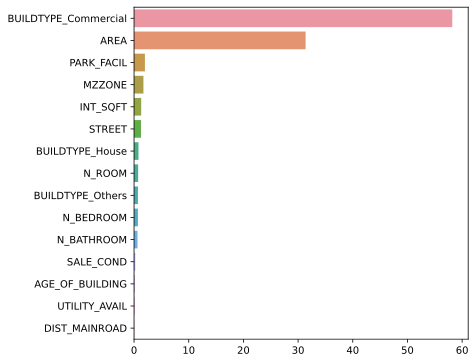

In [167]:
plt.figure(figsize=(6,6))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [159]:
main_features=feature_scores.loc[feature_scores >1]
main_features

BUILDTYPE_Commercial    58.196289
AREA                    31.376574
PARK_FACIL               1.989697
MZZONE                   1.715704
INT_SQFT                 1.308809
STREET                   1.277223
dtype: float32

In [160]:
score=[40.700150, 37.157658, 4.126828, 3.865907,3.694559,3.031277,2.770039,1.643945]
features=['BUILDTYPE_Commercial', 'AREA', 'INT_SQFT', 'MZZONE',"STREET","PARK_FACIL","BUILDTYPE_House","N_BEDROOM"]

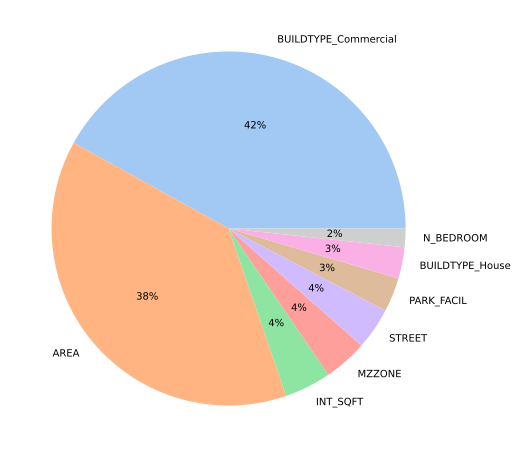

In [164]:
plt.figure(figsize=(10,8))
colors = sns.color_palette('pastel')
plt.pie(score, labels=features,colors =colors, autopct = '%0.0f%%')
plt.show()

# **Conclusion:**


**XG-Boost Model  performance well**